In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_file(file_name, speic_name):
    hist = []
    hist_temp = []
    hist_conv = []
    hist_count = []
    with open(file_name, 'r') as file:
        for line in file.readlines():
            if line[0:4] == 'Time':
                if hist_count != [] and hist_conv != []:
                    hist_temp.append(hist_count) 
                    hist_temp.append(hist_conv) 
                    hist.append(hist_temp)
                hist_count = []
                hist_conv = []
                hist_temp = []
                hist_temp.append(float(line.strip('Time (s): ')))
            else:
                string = '	' + str(speic_name) + ': '
                line = line.strip('. \n').split(string)
                if len(line) != 2:
                    print('Wrong species name!')
                    return 0
                else: 
                    hist_count.append(int(line[0]))
                    hist_conv.append(int(line[1]))
            hist_temp.append(hist_count) 
            hist_temp.append(hist_conv) 
            hist.append(hist_temp)
        return hist

In [3]:
def time_valid(file_name, t_i, t_f, speic_name):
    hist = read_file(file_name, speic_name)
    min_time = hist[0][0]
    max_time = hist[-1][0]
    if t_i == -1 and t_f == -1:
        return min_time, max_time 
    elif min_time <= t_i <= max_time and t_i <= t_f <= max_time:
        return t_i, t_f
    else:
        print('Wrong input time period!')
        return -1.0, -1.0

Start time(s):  0.0
End time(s):  0.2


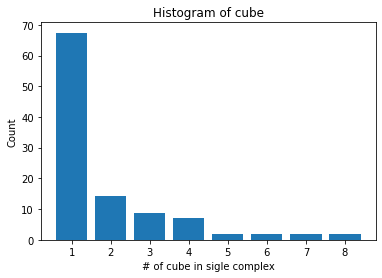

In [4]:
def hist(file_name, t_i, t_f, speic_name):
    t_i, t_f = time_valid(file_name, t_i, t_f, speic_name)
    if t_i != -1 and t_f != -1:
        hist = read_file(file_name, speic_name)
        plot_count = []
        plot_conv = []
        tot = 0
        for i in hist:
            if t_i <= i[0] <= t_f:
                tot += 1
                for j in i[2]:
                    if j not in plot_conv:
                        plot_conv.append(j)
                        plot_count.append(i[1][i[2].index(j)])
                    else:
                        index = plot_conv.index(j)
                        plot_count[index] += i[1][i[2].index(j)]
        plot_count_mean = []                
        for i in plot_count:
            plot_count_mean.append(i/tot)
        print('Start time(s): ', t_i)
        print('End time(s): ', t_f)
        plt.bar(plot_conv, plot_count_mean)
        plt.title('Histogram of ' + str(speic_name))
        plt.xlabel('# of ' + speic_name + ' in sigle complex')
        plt.ylabel('Count')
        plt.show()
        return 0
    else:
        return 0
    
if __name__ == '__main__':
    hist('histogram_complexes_time_cube.dat', 0.0, 0.2, 'cube')

Start time(s):  0.0
End time(s):  1.0


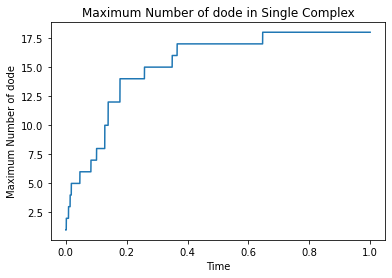

In [5]:
def max_complex(file_name, t_i, t_f, speic_name):
    t_i, t_f = time_valid(file_name, t_i, t_f, speic_name)
    if t_i != -1 and t_f != -1:
        hist = read_file(file_name, speic_name)
        plot_time = []
        plot_conv = []
        for i in hist:
            if t_i <= i[0] <= t_f:
                plot_time.append(i[0])
                plot_conv.append(max(i[2]))
        print('Start time(s): ', t_i)
        print('End time(s): ', t_f)
        plt.plot(plot_time, plot_conv)
        plt.title('Maximum Number of ' + str(speic_name) + ' in Single Complex')
        plt.xlabel('Time')
        plt.ylabel('Maximum Number of ' + str(speic_name))
        plt.show()
        return 0
    else:
        return 0
            
if __name__ == '__main__':
    max_complex('histogram_complexes_time_dode.dat', 0.0, 1.0, 'dode')

Start time(s):  0
End time(s):  1.0
Exclude Number:  0


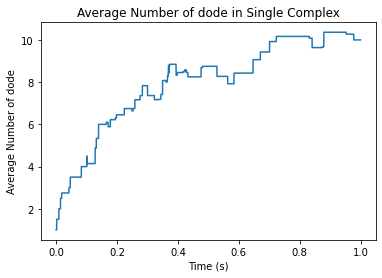

In [6]:
def mean_complex(file_name, t_i, t_f, speic_name, ExcludeNum = 0):
    t_i, t_f = time_valid(file_name, t_i, t_f, speic_name)
    if t_i != -1 and t_f != -1:
        hist = read_file(file_name, speic_name)
        plot_time = []
        plot_conv = []
        if ExcludeNum == 0:
            for i in hist:
                if t_i <= i[0] <= t_f:
                    plot_time.append(i[0])
                    plot_conv.append(np.mean(i[2]))
        elif ExcludeNum > 0:
            for i in hist:
                if t_i <= i[0] <= t_f:
                    count = 1
                    N = 0
                    temp_sum = 0
                    plot_time.append(i[0])
                    while count <= len(i[1]):
                        if i[2][count-1] >= ExcludeNum:
                            temp_sum += i[2][count-1]
                            N += 1
                        if count == len(i[1]):
                            if N != 0:
                                plot_conv.append(temp_sum/N)
                            else:
                                plot_conv.append(0)
                        count += 1
        else:
            print('ExcludeNum cannot smaller than 0!')
            return 0
        print('Start time(s): ', t_i)
        print('End time(s): ', t_f)
        print('Exclude Number: ', ExcludeNum)
        plt.plot(plot_time, plot_conv)
        plt.title('Average Number of ' + str(speic_name) + ' in Single Complex')
        plt.xlabel('Time (s)')
        plt.ylabel('Average Number of ' + str(speic_name))
        plt.show()
        return 0
    else:
        return 0
            
if __name__ == '__main__':
    mean_complex('histogram_complexes_time_dode.dat', 0, 1.0, 'dode', 0)

In [7]:
import pandas as pd

def hist_to_df(file_name, speic_name_list = []):
    df = pd.DataFrame(columns = ['Time(s)'])
    index = -1
    with open(file_name, 'r') as file:
        for line in file.readlines():
            pos = 0
            if line[0:4] == 'Time':
                index += 1
                time = float(line.replace('Time (s): ', ''))
                df.loc[index, 'Time(s)'] = time
            else:
                for i in line:
                    if i in ['1','2','3','4','5','6','7','8','9','0']:
                        pos += 1
                    else:
                        break
                num = int(line[0:pos])
                name = line[pos+1:-2]
                if speic_name_list != []:
                    if name in speic_name_list:
                        if name not in df.columns:
                            df[name] = -1
                        df.loc[index, name] = num
                else:
                    if name not in df.columns:
                        df[name] = -1
                    df.loc[index, name] = num
    df = df.replace({-1:0})
    df = df.fillna(0) 
    df.to_csv('hist_to_df.csv')
    return df

hist_to_df(file_name = 'multi_comp_hist.dat', speic_name_list = ['B: 1. IL: 1.', 'B: 1.'])

,Time(s),B: 1.,B: 1. IL: 1.
0,0.00000,200.0,0.0
1,0.00002,194.0,6.0
2,0.00004,192.0,8.0
3,0.00006,185.0,15.0
4,0.00008,182.0,18.0
...,...,...,...
4996,0.09992,39.0,161.0
4997,0.09994,39.0,161.0
4998,0.09996,41.0,159.0
4999,0.09998,41.0,159.0


In [8]:
def hist_temp(file_name, t_i, t_f, speic_name):
    t_i, t_f = time_valid(file_name, t_i, t_f, speic_name)
    if t_i != -1 and t_f != -1:
        hist = read_file(file_name, speic_name)
        plot_count = []
        plot_conv = []
        tot = 0
        for i in hist:
            if t_i <= i[0] <= t_f:
                tot += 1
                for j in i[2]:
                    if j not in plot_conv:
                        plot_conv.append(j)
                        plot_count.append(i[1][i[2].index(j)])
                    else:
                        index = plot_conv.index(j)
                        plot_count[index] += i[1][i[2].index(j)]
        plot_count_mean = []                
        for i in plot_count:
            plot_count_mean.append(i/tot)
        return plot_conv, plot_count_mean
    else:
        return 0

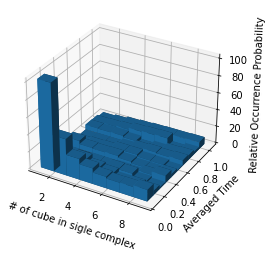

In [9]:
def hist_3d_time(file_name, t_i, t_f, speic_name, time_bins):
    t_arr = np.arange(t_i, t_f, (t_f-t_i)/time_bins)
    t_arr = np.append(t_arr, t_f)
    max_num = 0
    x_lst = []
    z_lst = []
    t_plt = np.zeros(time_bins)
    i = 0
    for i in range(0, len(t_arr)-1):
        t_plt[i] = (t_arr[i]+t_arr[i+1])/2
        x,z = hist_temp(file_name, t_arr[i], t_arr[i+1], speic_name)
        x_lst.append(x)
        z_lst.append(z)
        if max(x) > max_num:
            max_num = max(x)
    z_plt = np.zeros(shape = (max_num, time_bins))
    k = 0
    for i in x_lst:
        l = 0
        for j in i:
            z_plt[j-1, k] = z_lst[k][l]
            l += 1
        k += 1
    x_plt = np.arange(0, max_num, 1)+1
    
    xx, yy = np.meshgrid(x_plt, t_plt)
    X, Y = xx.ravel(), yy.ravel()
    Z = z_plt.ravel()
    bottom = np.zeros_like(Z)
    width = 1
    depth = 1/time_bins
    
    fig=plt.figure()
    ax=fig.gca(projection='3d')
    ax.bar3d(X, Y, bottom, width, depth, Z, shade=True)
    ax.set_xlabel('# of ' + speic_name + ' in sigle complex')
    ax.set_ylabel('Averaged Time')
    ax.set_zlabel('Relative Occurrence Probability')
    plt.show()

    
hist_3d_time('histogram_complexes_time_cube.dat', 0, 1.0, 'cube', 10)

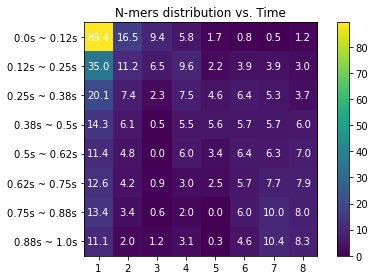

In [10]:
def hist_time_heatmap(file_name, t_i, t_f, speic_name, time_bins, show_num = True):
    t_arr = np.arange(t_i, t_f, (t_f-t_i)/time_bins)
    t_arr = np.append(t_arr, t_f)
    max_num = 0
    x_lst = []
    z_lst = []
    t_plt = []
    i = 0
    for i in range(0, len(t_arr)-1):
        t_plt.append(str(round(t_arr[i],2)) + 's ~ ' + str(round(t_arr[i+1],2)) + 's')
        x,z = hist_temp(file_name, t_arr[i], t_arr[i+1], speic_name)
        x_lst.append(x)
        z_lst.append(z)
        if max(x) > max_num:
            max_num = max(x)
    z_plt = np.zeros(shape = (max_num, time_bins))
    k = 0
    for i in x_lst:
        l = 0
        for j in i:
            z_plt[j-1, k] = z_lst[k][l]
            l += 1
        k += 1
    x_plt = np.arange(0, max_num, 1)+1
    z_plt_ = np.array(z_plt).T
    
    fig, ax = plt.subplots()
    im = ax.imshow(z_plt_)
    ax.set_xticks(np.arange(len(x_plt)))
    ax.set_yticks(np.arange(len(t_plt)))
    ax.set_xticklabels(x_plt)
    ax.set_yticklabels(t_plt)
    if show_num:
        for i in range(len(t_plt)):
            for j in range(len(x_plt)):
                text = ax.text(j, i, round(z_plt_[i, j],1),ha='center', va='center', color='w')
    ax.set_title('N-mers distribution vs. Time')
    fig.tight_layout()
    plt.colorbar(im)
    plt.show()
    

hist_time_heatmap('histogram_complexes_time_cube.dat', 0, 1.0, 'cube', 8, True)

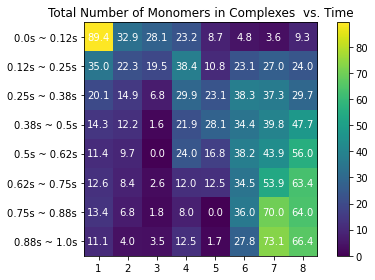

In [11]:
def hist_time_heatmap_mult_nmers(file_name, t_i, t_f, speic_name, time_bins, show_num = True):
    t_arr = np.arange(t_i, t_f, (t_f-t_i)/time_bins)
    t_arr = np.append(t_arr, t_f)
    max_num = 0
    x_lst = []
    z_lst = []
    t_plt = []
    i = 0
    for i in range(0, len(t_arr)-1):
        t_plt.append(str(round(t_arr[i],2)) + 's ~ ' + str(round(t_arr[i+1],2)) + 's')
        x,z = hist_temp(file_name, t_arr[i], t_arr[i+1], speic_name)
        x_lst.append(x)
        z_lst.append(z)
        if max(x) > max_num:
            max_num = max(x)
    z_plt = np.zeros(shape = (max_num, time_bins))
    k = 0
    for i in x_lst:
        l = 0
        for j in i:
            z_plt[j-1, k] = z_lst[k][l]
            l += 1
        k += 1
    x_plt = np.arange(0, max_num, 1)+1
    const = 1
    z_plt_mod = []
    for i in z_plt:
        z_plt_mod_temp = []
        for j in i:
            z_plt_mod_temp.append(j * const)
        const += 1
        z_plt_mod.append(z_plt_mod_temp)
    z_plt_ = np.array(z_plt_mod).T
    
    fig, ax = plt.subplots()
    im = ax.imshow(z_plt_)
    ax.set_xticks(np.arange(len(x_plt)))
    ax.set_yticks(np.arange(len(t_plt)))
    ax.set_xticklabels(x_plt)
    ax.set_yticklabels(t_plt)
    if show_num:
        for i in range(len(t_plt)):
            for j in range(len(x_plt)):
                text = ax.text(j, i, round(z_plt_[i, j],1),ha='center', va='center', color='w')
    ax.set_title('Total Number of Monomers in Complexes  vs. Time')
    fig.tight_layout()
    plt.colorbar(im)
    plt.show()
    

hist_time_heatmap_mult_nmers('histogram_complexes_time_cube.dat', 0, 1.0, 'cube', 8, True)

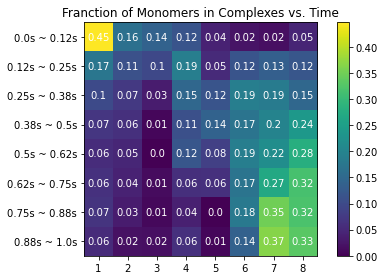

In [12]:
def hist_time_heatmap_percent(file_name, t_i, t_f, speic_name, time_bins, show_num = True):
    t_arr = np.arange(t_i, t_f, (t_f-t_i)/time_bins)
    t_arr = np.append(t_arr, t_f)
    xx, zz = hist_temp(file_name, 0, 0, speic_name)
    n_tot = sum(zz)
    max_num = 0
    x_lst = []
    z_lst = []
    t_plt = []
    i = 0
    for i in range(0, len(t_arr)-1):
        t_plt.append(str(round(t_arr[i],2)) + 's ~ ' + str(round(t_arr[i+1],2)) + 's')
        x,z = hist_temp(file_name, t_arr[i], t_arr[i+1], speic_name)
        x_lst.append(x)
        z_lst.append(z)
        if max(x) > max_num:
            max_num = max(x)
    z_plt = np.zeros(shape = (max_num, time_bins))
    k = 0
    for i in x_lst:
        l = 0
        for j in i:
            z_plt[j-1, k] = z_lst[k][l]
            l += 1
        k += 1
    x_plt = np.arange(0, max_num, 1)+1
    const = 1
    z_plt_mod = []
    for i in z_plt:
        z_plt_mod_temp = []
        for j in i:
            z_plt_mod_temp.append(j * const / n_tot)
        const += 1
        z_plt_mod.append(z_plt_mod_temp)
    z_plt_ = np.array(z_plt_mod).T
    
    fig, ax = plt.subplots()
    im = ax.imshow(z_plt_)
    ax.set_xticks(np.arange(len(x_plt)))
    ax.set_yticks(np.arange(len(t_plt)))
    ax.set_xticklabels(x_plt)
    ax.set_yticklabels(t_plt)
    if show_num:
        for i in range(len(t_plt)):
            for j in range(len(x_plt)):
                text = ax.text(j, i, round(z_plt_[i, j],2),ha='center', va='center', color='w')
    ax.set_title('Franction of Monomers in Complexes vs. Time')
    fig.tight_layout()
    plt.colorbar(im)
    plt.show()
    

hist_time_heatmap_percent('histogram_complexes_time_cube.dat', 0, 1.0, 'cube', 8, True)